# Hand-written digits recognition

In [198]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics, svm
from PIL import Image
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

## Digits dataset

The digits dataset consists of 1797 8x8 images

In [199]:
digits = datasets.load_digits()
X=digits.data # the 8x8 images
y=digits.target # the digit they belong to

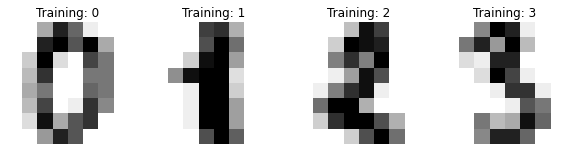

In [200]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3)) #displaying numbers 0-3 to test
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

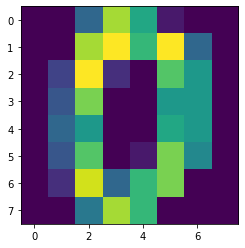

In [201]:
plt.imshow(digits.images[0]) #displaying the first image

## Plotting digits 0-9

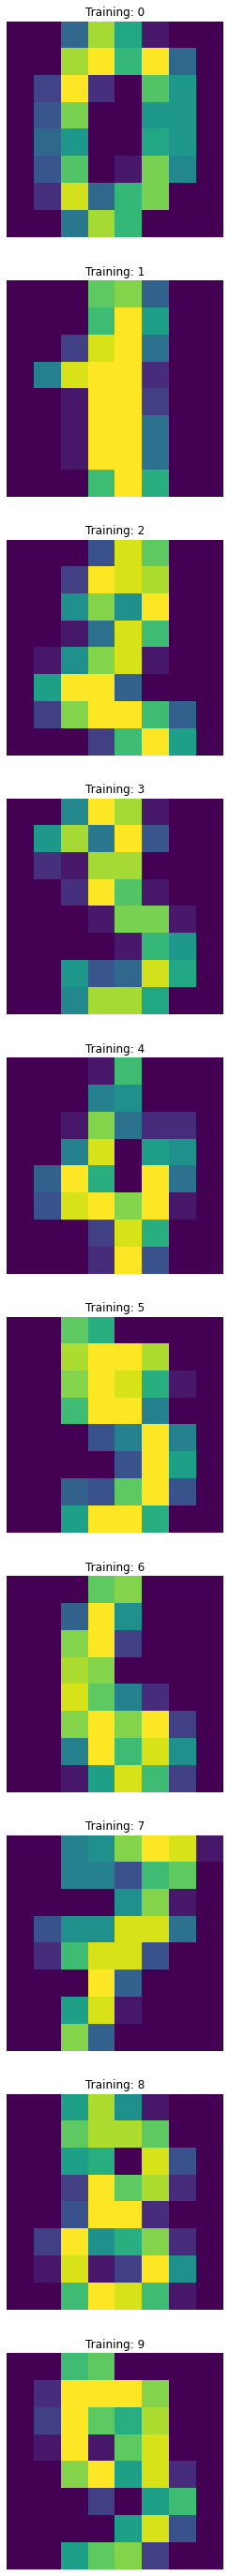

In [202]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=10, ncols=1, figsize=(100, 50))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title("Training: %i" % label)

## Splitting the dataset for training and testing
- The X variable (input) will be images of numbers 0-9
- The Y variable (output) will be the corresponding integer

- The data is split with a test size of 0.3. This means that 70% of the data will be used to train the three models. 

- A random_state value of 101 is used arbitrarily to ensure that the data is split in the same order by the random number generator every time the code runs.

In [1]:
from sklearn.model_selection import train_test_split

In [190]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False, random_state=101)



## Training models with the dataset

### Support Vector Classification 

In [191]:
clf = svm.SVC(gamma=0.001)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

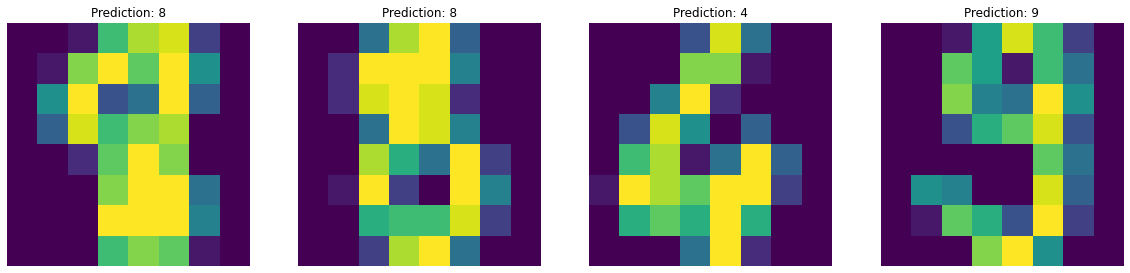

In [205]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
for ax, image, prediction in zip(axes, x_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image)
    ax.set_title(f"Prediction: {prediction}") #example of the model predicting a number given a 8x8 image input


### K-Nearest Neighbor Classification

In [224]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])
# Scaler is used to normalize the data as a preprocessing step before the data is used for training
knn.fit(x_train, y_train)
knnPredicted = knn.predict(x_test)

### Random Forest Classifier

In [210]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rfPredicted = rf.predict(x_test)

## Classification Reports

Support Vector Classification had the highest accuracy (0.97) with KNN classification and Random Forest classification coming in very close at 0.92 and 0.93 respectively. This means that SVC had a 97% success rate at recognizing hand written digits correctly.

In [213]:
print(f"Classification report for classifier {clf}:\n"f"{metrics.classification_report(y_test, predicted)}\n")
print(f"Classification report for classifier {knn}:\n"f"{metrics.classification_report(y_test, knnPredicted)}\n")
print(f"Classification report for classifier {rf}:\n"f"{metrics.classification_report(y_test, rfPredicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Classification report for classifier Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))]):
              precision    recall  f1

## Training the models on a downscaled version of the dataset - X_new
- The value of every 4 colums will be averaged then merged to create a 16x1 array for each image

In [217]:
X_new = np.empty((n_samples, 16)) #creating a new numpy array with size nsamples and 16

for i in range(n_samples):
    for j in range(0, data.shape[1], 4):
        X_new[i, j // 4] = np.mean(data[i, j:j+4]) #averaging 4 pixels

In [218]:
print(X_new.shape)

(1797, 16)


## Train-test split for X_new

In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, digits.target, test_size=0.5, shuffle=False) #X_new train test split

## Training and evaluating the results with X_new

In [223]:
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)

knn = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])
knn.fit(X_train, Y_train)
knnPredicted = knn.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rfPredicted = rf.predict(X_test)

print(f"Classification report for classifier {clf}:\n"f"{metrics.classification_report(y_test, predicted)}\n")
print(f"Classification report for classifier {knn}:\n"f"{metrics.classification_report(y_test, knnPredicted)}\n")
print(f"Classification report for classifier {rf}:\n"f"{metrics.classification_report(y_test, rfPredicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        88
           1       0.85      0.31      0.45        91
           2       0.90      0.85      0.87        86
           3       0.79      0.85      0.82        91
           4       0.93      0.84      0.88        92
           5       0.88      0.95      0.91        91
           6       0.93      0.99      0.96        91
           7       0.93      0.98      0.95        89
           8       0.47      0.53      0.50        88
           9       0.86      0.90      0.88        92

    accuracy                           0.81       899
   macro avg       0.82      0.81      0.80       899
weighted avg       0.82      0.81      0.80       899


Classification report for classifier Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))]):
              precision    recall  f1

Between the original dataset and X_new, the accuracy of all three models decreased substantially. This is because the image has been condensed as we averaged every 4 pixels. This results in less detail for the models to train on, resulting in less accurate predictions from the model. Surprisingly, SVC is no longer in the lead with X_new, with KNN and RFC tying. This is likely due to the underlying structure of the models, with KNN and RFC working better than SVC in this specific scenario when given less detail. 